In [2]:
# Importing important modules for performing analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

In [3]:
# Importing sample data

data = pd.read_csv("chipotle_sample_data.csv", delimiter= "\t")

In [4]:
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


## Performing Sales Analysis

In [5]:
# Finding all the columns with missing instances

data.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [6]:
# Converting the item_price from string to float

data['item_price'] = data['item_price'].str.replace("$", "").astype(float)

In [7]:
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [8]:
# Replacing the empty instances with boolean value

data['choice_description'].fillna('none', inplace = True)

C:\Users\fahim\AppData\Local\Temp\ipykernel_11660\2324829463.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['choice_description'].fillna('none', inplace = True)


In [9]:
# Performing the sales analysis

sales_analysis = data.groupby('item_name').agg(
    Total_Order = pd.NamedAgg(column='quantity', aggfunc= 'sum'),
    Total_Sales = pd.NamedAgg(column='item_price', aggfunc= 'sum') 
).reset_index().sort_values(by= 'Total_Sales', ascending= False)

In [10]:
sales_analysis.head()

,item_name,Total_Order,Total_Sales
17,Chicken Bowl,761,7342.73
18,Chicken Burrito,591,5575.82
39,Steak Burrito,386,3851.43
38,Steak Bowl,221,2260.19
25,Chips and Guacamole,506,2201.04


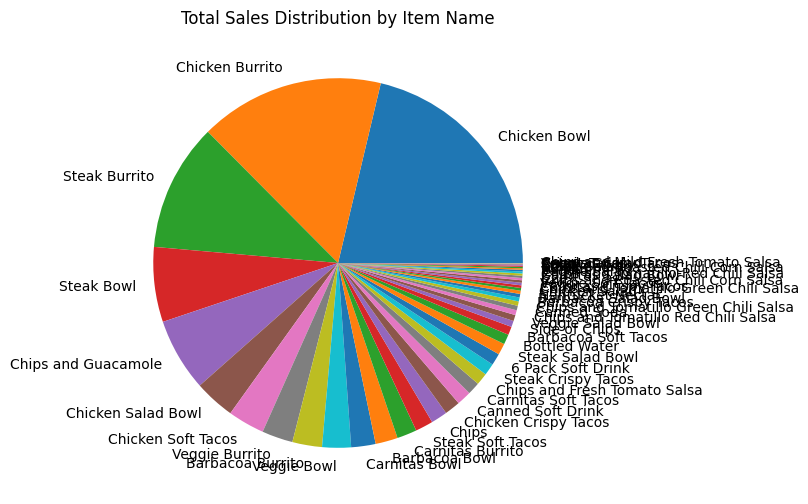

In [11]:
# Pie Plot to show the Total sales distribution of every items

plt.figure(figsize= (10, 6))
plt.pie(sales_analysis['Total_Sales'], labels= sales_analysis['item_name'])
plt.title('Total Sales Distribution by Item Name')
plt.show()

## Customer Preference Analysis

In [12]:
# Finding the top 10 popular items

popular_items = sales_analysis.head(10)['item_name']
popular_items

17           Chicken Bowl
18        Chicken Burrito
39          Steak Burrito
38             Steak Bowl
25    Chips and Guacamole
21     Chicken Salad Bowl
22     Chicken Soft Tacos
45         Veggie Burrito
2        Barbacoa Burrito
44            Veggie Bowl
Name: item_name, dtype: object

In [13]:
# Popular choices based on the item names

items_in_popular_items = data['item_name'].isin(popular_items)
data[items_in_popular_items].groupby('item_name')['choice_description'].value_counts().head()

item_name         choice_description                                                                      
Barbacoa Burrito  [Tomatillo Red Chili Salsa, [Rice, Cheese, Lettuce]]                                        9
                  [Tomatillo-Green Chili Salsa (Medium), [Rice, Cheese, Sour Cream, Lettuce]]                 4
                  [Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Lettuce]]                                  2
                  [Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Sour Cream, Lettuce]]                      2
                  [Roasted Chili Corn Salsa (Medium), [Rice, Fajita Veggies, Cheese, Sour Cream, Lettuce]]    2
Name: count, dtype: int64

## Order Quantity Prediction Using Linear Regression

In [14]:
# Descriptive Feature

order_price = data[['item_price']]

In [15]:
# Target Feature

order_quantity = data[['quantity']]

In [16]:
# Performing Linear Regression on the data (Base Model)

lr = LinearRegression()

In [17]:
# Fitting the features to the model

lr.fit(order_price, order_quantity)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Splitting the data into 80:20; 80% of data for training and 20% of data for testing

df_train, df_test, tf_train, tf_test = train_test_split(order_price, order_quantity, test_size=0.2)

In [19]:
# Generating prediction of the model

tf_pred = lr.predict(df_test)

Text(0.5, 1.0, 'Item Price vs Quantity Ordered')

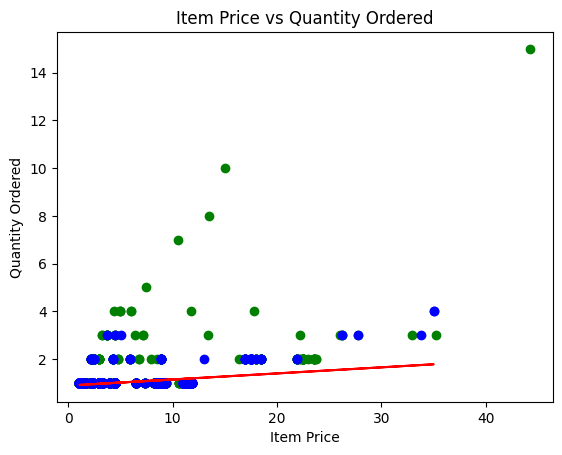

In [20]:
# Comparison of training dataset, testing dataset and the linear regression

plt.scatter(df_train, tf_train, color= 'green', label= 'Training Dataset')
plt.scatter(df_test, tf_test, color= 'blue', label= 'Testing Dataset')
plt.plot(df_test, tf_pred, color= 'red', label= 'Linear Regression')
plt.xlabel('Item Price')
plt.ylabel('Quantity Ordered')
plt.title('Item Price vs Quantity Ordered')

## Order Quantity Prediction Using Tuned Linear Regression

In [21]:
# Performing Linear Regression on the data (Tuned Model)

# Creating a pipeline for Linear Regression and applying Scaling

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])

In [22]:
# Assigning hyperparameters for a tuned model

param_grid = {'lr__fit_intercept': [True, False]}

In [23]:
# Creating a tuned model using Grid Search

lr_tuned = GridSearchCV(pipe, param_grid, cv=10)

In [24]:
# Training the tuned model

lr_tuned.fit(df_train, tf_train)

,estimator,Pipeline(step...egression())])
,param_grid,"{'lr__fit_intercept': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [25]:
# Obtaining the best parameters for the tuned model

print(lr_tuned.best_params_)

{'lr__fit_intercept': True}


In [26]:
# Prediction using the tuned model

tf_pred_tuned = lr_tuned.predict(df_test)

Text(0.5, 1.0, 'Item Price vs Quantity Ordered')

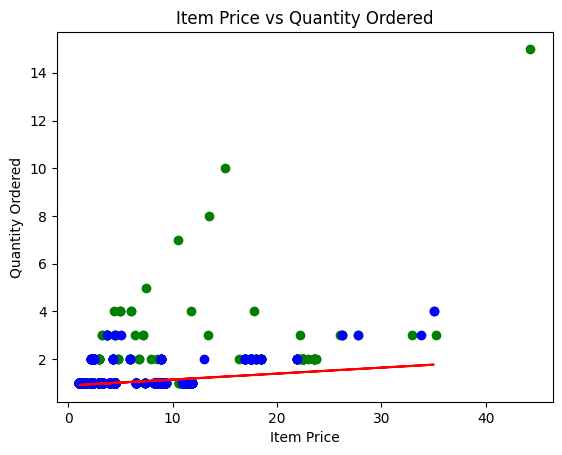

In [27]:
# Comparison of training dataset, testing dataset and the linear regression

plt.scatter(df_train, tf_train, color= 'green', label= 'Training Dataset')
plt.scatter(df_test, tf_test, color= 'blue', label= 'Testing Dataset')
plt.plot(df_test, tf_pred_tuned, color= 'red', label= 'Tuned Linear Regression')
plt.xlabel('Item Price')
plt.ylabel('Quantity Ordered')
plt.title('Item Price vs Quantity Ordered')

In [28]:
# Finding the Mean Squared Error of the base Linear Regression Model

mse = mean_squared_error(tf_test, tf_pred)
print("The mean squared error for the base model: ", mse)

# Finding the Mean Absolute Error of the base Linear Regression Model

mae = mean_absolute_error(tf_test, tf_pred)
print("The mean absolute error for the base model: ", mae)

# Finding the R² Score of the base Linear Regression Model

r2 = r2_score(tf_test, tf_pred)
print("The R² score for the base model: ", r2)

The mean squared error for the base model:  0.07341150124139584
The mean absolute error for the base model:  0.14889313942972324
The R² score for the base model:  0.15232502362119682


In [29]:
# Finding the Mean Squared Error of the tuned Linear Regression Model

mse_tuned = mean_squared_error(tf_test, tf_pred_tuned)
print("The mean squared error for the tuned model: ", mse_tuned)

# Finding the Mean Absolute Error of the tune Linear Regression Model

mae_tuned = mean_absolute_error(tf_test, tf_pred_tuned)
print("The mean absolute error for the tuned model: ", mae_tuned)

# Finding the R² Score of the tuned Linear Regression Model

r2 = r2_score(tf_test, tf_pred_tuned)
print("The R² score for the tuned model: ", r2)

The mean squared error for the tuned model:  0.073575141754947
The mean absolute error for the tuned model:  0.14930780990978224
The R² score for the tuned model:  0.15043548361570125


## K-Means Algorithm For Customer Segments Based On Orders

In [30]:
# Grouping data by the id and creating another dataset with the grouped id, total quantity (of specific id) and total spent (of specific id)

ordered_data = data.groupby('order_id').agg(
                            Total_Items = pd.NamedAgg(column= 'quantity', aggfunc= 'sum'),
                            Total_Spent = pd.NamedAgg(column= 'item_price', aggfunc = 'sum')
                            ).reset_index()

In [31]:
ordered_data.head()

,order_id,Total_Items,Total_Spent
0,1,4,11.56
1,2,2,16.98
2,3,2,12.67
3,4,2,21.00
4,5,2,13.70


In [32]:
# Creating a KMeans model with 3 clusters

k_means = KMeans(n_clusters = 3)

In [33]:
order_segments = k_means.fit_predict(ordered_data[['Total_Items', 'Total_Spent']])

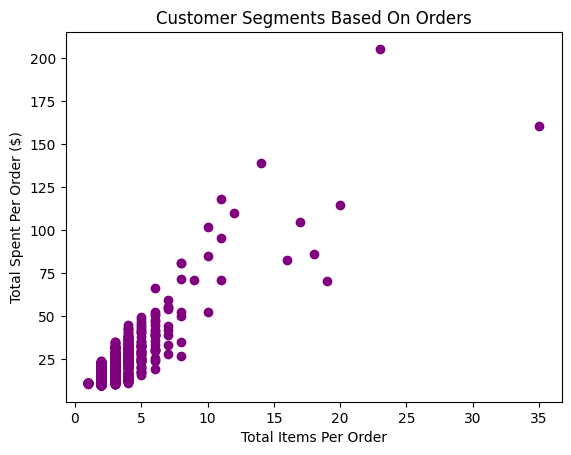

In [34]:
# Comparing Total Spent per Order and Total Items per Order

plt.scatter(ordered_data['Total_Items'], ordered_data['Total_Spent'], color= 'purple')
plt.xlabel('Total Items Per Order')
plt.ylabel('Total Spent Per Order ($)')
plt.title('Customer Segments Based On Orders')
plt.show()

## Silhouette Analysis for Validating Cluster Quality

For n_clusters: 2, the average silhouette score is: 0.896955
For n_clusters: 3, the average silhouette score is: 0.626737
For n_clusters: 4, the average silhouette score is: 0.618869
For n_clusters: 5, the average silhouette score is: 0.605959
For n_clusters: 6, the average silhouette score is: 0.601632
For n_clusters: 7, the average silhouette score is: 0.600153
For n_clusters: 8, the average silhouette score is: 0.599347
For n_clusters: 9, the average silhouette score is: 0.599461


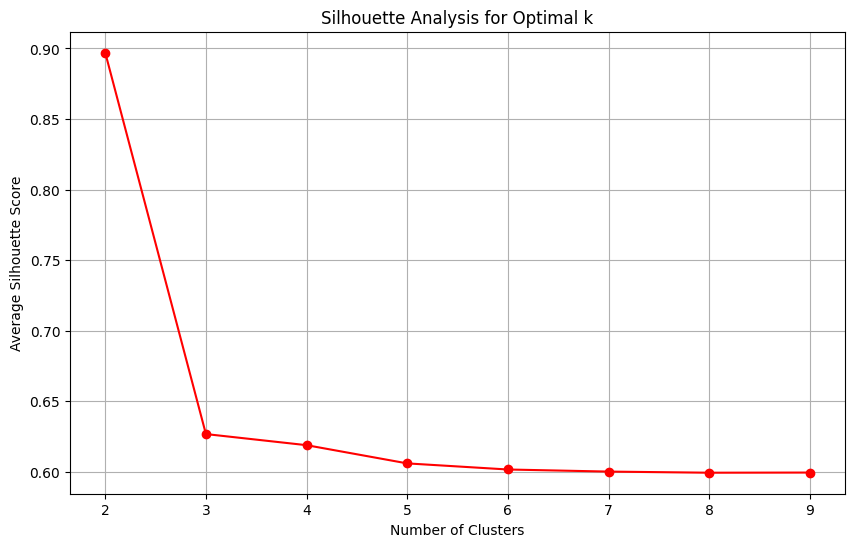

In [35]:
silhouette_avg_scores = []
k_range = range(2, 10)  #Number of clusters=k

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(ordered_data[['Total_Items', 'Total_Spent']])
    
    # Calculating the average silhouette score
    silhouette_avg = silhouette_score(ordered_data[['Total_Items', 'Total_Spent']], cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters: {k}, the average silhouette score is: {silhouette_avg:3f}")
    
# Plotting silhouette scores
plt.figure(figsize = (10, 6))
plt.plot(k_range, silhouette_avg_scores, marker = 'o', color= 'red')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.grid(True)
plt.show()

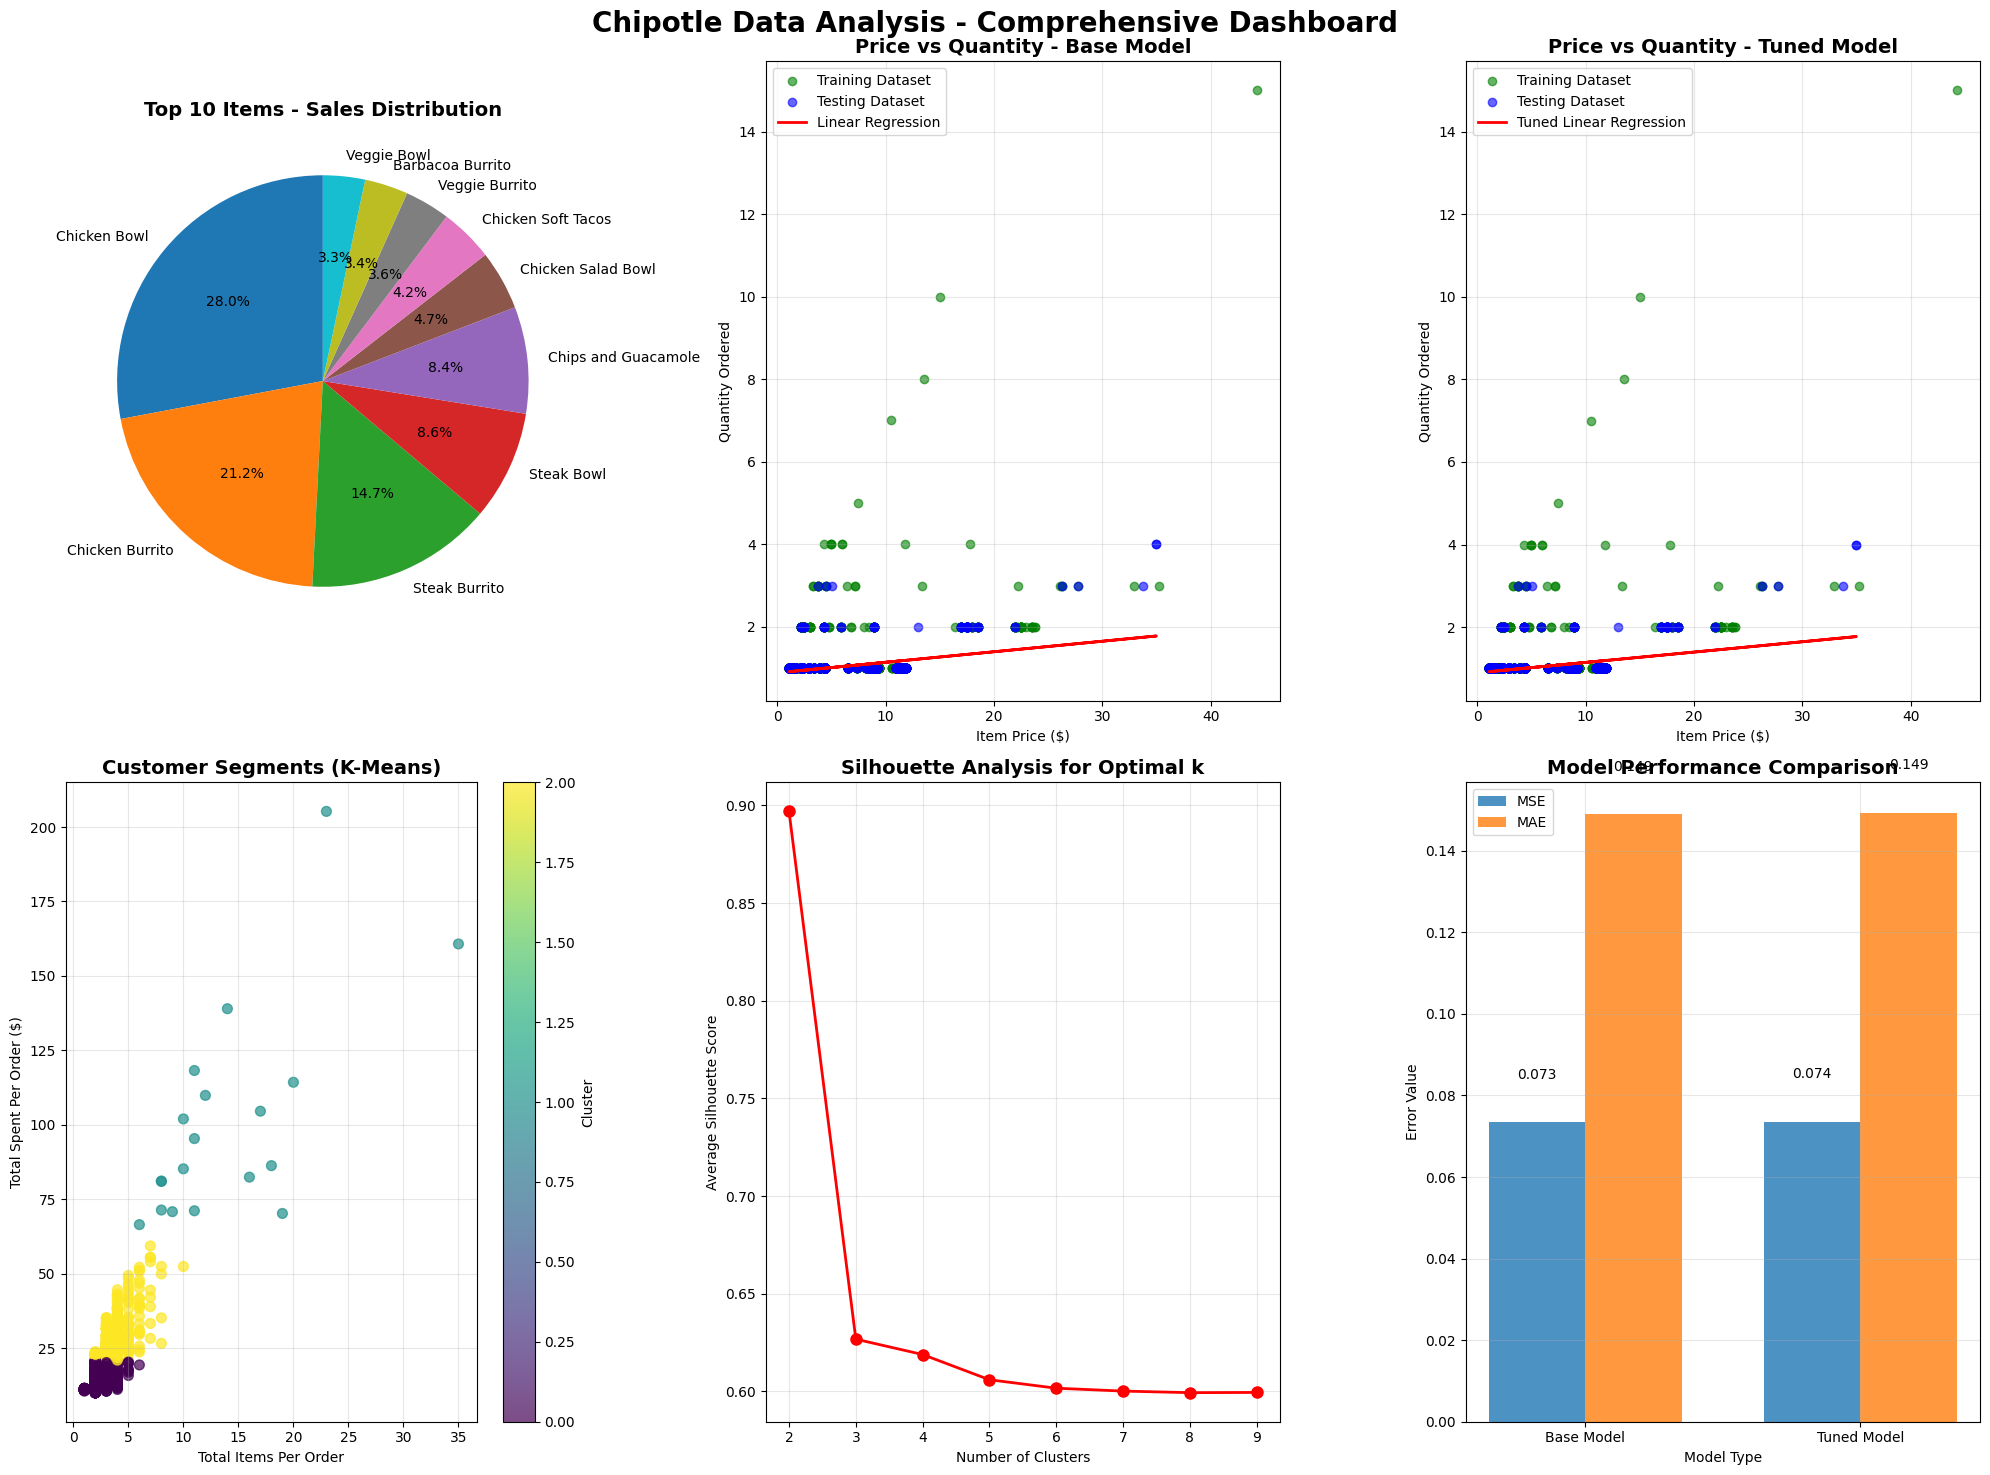

In [36]:
# Create a fixed unified dashboard with proper R² values and no overlapping

fig = plt.figure(figsize=(20, 16))
fig.suptitle('Chipotle Data Analysis - Comprehensive Dashboard', fontsize=20, fontweight='bold', y=0.98)

# 1. Sales Distribution Pie Chart
ax1 = plt.subplot(2, 3, 1)
plt.pie(sales_analysis['Total_Sales'].head(8), labels=sales_analysis['item_name'].head(8), 
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
plt.title('Top 8 Items - Sales Distribution', fontsize=12, fontweight='bold', pad=10)

# 2. Linear Regression Visualization (Base Model)
ax2 = plt.subplot(2, 3, 2)
plt.scatter(df_train, tf_train, color='green', label='Training Dataset', alpha=0.6, s=30)
plt.scatter(df_test, tf_test, color='blue', label='Testing Dataset', alpha=0.6, s=30)
plt.plot(df_test, tf_pred, color='red', label='Linear Regression', linewidth=2)
plt.xlabel('Item Price ($)', fontsize=10)
plt.ylabel('Quantity Ordered', fontsize=10)
plt.title('Price vs Quantity - Base Model', fontsize=12, fontweight='bold', pad=10)
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 3. Linear Regression Visualization (Tuned Model)
ax3 = plt.subplot(2, 3, 3)
plt.scatter(df_train, tf_train, color='green', label='Training Dataset', alpha=0.6, s=30)
plt.scatter(df_test, tf_test, color='blue', label='Testing Dataset', alpha=0.6, s=30)
plt.plot(df_test, tf_pred_tuned, color='red', label='Tuned Linear Regression', linewidth=2)
plt.xlabel('Item Price ($)', fontsize=10)
plt.ylabel('Quantity Ordered', fontsize=10)
plt.title('Price vs Quantity - Tuned Model', fontsize=12, fontweight='bold', pad=10)
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 4. Customer Segmentation Scatter Plot
ax4 = plt.subplot(2, 3, 4)
scatter = plt.scatter(ordered_data['Total_Items'], ordered_data['Total_Spent'], 
                     c=order_segments, cmap='viridis', alpha=0.7, s=40)
plt.xlabel('Total Items Per Order', fontsize=10)
plt.ylabel('Total Spent Per Order ($)', fontsize=10)
plt.title('Customer Segments (K-Means)', fontsize=12, fontweight='bold', pad=10)
cbar = plt.colorbar(scatter, label='Cluster')
cbar.ax.tick_params(labelsize=8)
plt.grid(True, alpha=0.3)

# 5. Silhouette Analysis
ax5 = plt.subplot(2, 3, 5)
plt.plot(k_range, silhouette_avg_scores, marker='o', color='red', linewidth=2, markersize=6)
plt.xlabel('Number of Clusters', fontsize=10)
plt.ylabel('Average Silhouette Score', fontsize=10)
plt.title('Silhouette Analysis for Optimal k', fontsize=12, fontweight='bold', pad=10)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# 6. Model Performance Comparison (Fixed with R²)
ax6 = plt.subplot(2, 3, 6)

# Calculate R² for both models
r2_base = r2_score(tf_test, tf_pred)
r2_tuned = r2_score(tf_test, tf_pred_tuned)

metrics = ['MSE', 'MAE', 'R²']
base_scores = [mse, mae, r2_base]
tuned_scores = [mse_tuned, mae_tuned, r2_tuned]

x = np.arange(len(metrics))
width = 0.35

bars1 = plt.bar(x - width/2, base_scores, width, label='Base Model', alpha=0.8, color='skyblue')
bars2 = plt.bar(x + width/2, tuned_scores, width, label='Tuned Model', alpha=0.8, color='lightcoral')

plt.xlabel('Metrics', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.title('Model Performance Comparison', fontsize=12, fontweight='bold', pad=10)
plt.xticks(x, metrics)
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars with proper formatting
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    
    # Format values based on metric type
    if metrics[i] == 'R²':
        label1 = f'{height1:.3f}'
        label2 = f'{height2:.3f}'
    else:
        label1 = f'{height1:.2f}'
        label2 = f'{height2:.2f}'
    
    plt.text(bar1.get_x() + bar1.get_width()/2., height1 + max(base_scores + tuned_scores) * 0.01,
             label1, ha='center', va='bottom', fontsize=8)
    plt.text(bar2.get_x() + bar2.get_width()/2., height2 + max(base_scores + tuned_scores) * 0.01,
             label2, ha='center', va='bottom', fontsize=8)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()